<a href="https://colab.research.google.com/github/MJMortensonWarwick/ADA2425/blob/main/5_2_PCA_part_two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA): Part two
Here we'll work through a (slightly) more realistic example. We'll be dimension reducing the famous hand-written digits dataset (https://mxnet.apache.org/versions/1.1.0/tutorials/gluon/mnist.html).

The data is a bunch of images of handwritten numbers between 0 and 9. This is often used to train classifiers (i.e. can we classify a person's writing correctly), but it provides a useful example here too. We'll start by loading them in from sklearn:



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

# load the digits dataset from scikit learn
digits = load_digits()
# show the shape of data set (rows x columns)
digits.data.shape

(1797, 64)

We get 1797 "rows" and 64 "columns" ... but what does this mean? The first part is easy ... we have 1797 image examples. The second part is the detail of the images themselves.

Digital images are, of course, just a bunch of pixels where each pixel has a numerical value (in the case of black-and-white images - colour image pixels have multiple numerical values as we'll see later in the module). Our images here are squares, so our 64 columns represent an 8x8 image (8 pixels across and 8 pixels down). We can visualise this by looking at the first row/image:

In [ ]:
# display the numerical values of the image with index 0 (first image)
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Here the higher the number the darker the pixel, so the 0 valued items around the borders of the image and in its centre will all be white in image space. Given this we may reasonably assume the picture is of a handwritten zero. Let's verify this:

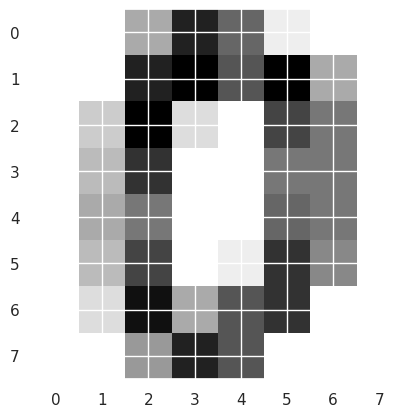

In [ ]:
# Display the image of the first digit (index 0)
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)
plt.show()

Hopefully you can see the overlap between the array of numbers we first saw and the actual image. Now for some code you don't need to understand to view four examples of each of the digits as an image:

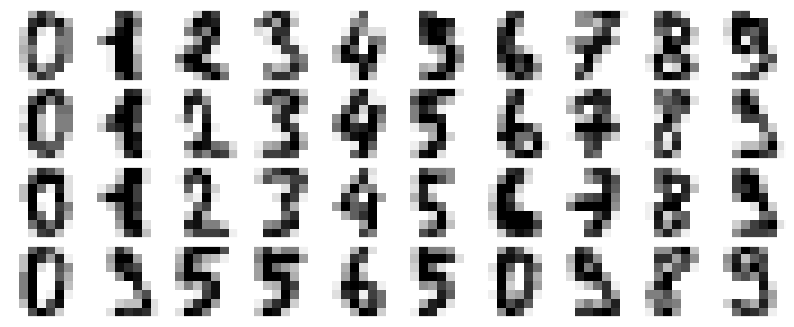

In [ ]:
# helper function to print the digits to screen
def plot_digits(data):
	fig, axes = plt.subplots(4, 10, figsize=(10, 4),
							 subplot_kw={'xticks':[], 'yticks':[]},
							 gridspec_kw=dict(hspace=0.1, wspace=0.1))
	for i, ax in enumerate(axes.flat):
		ax.imshow(data[i].reshape(8, 8),
			  cmap='binary', interpolation='nearest',
			  clim=(0, 16))

# print to screen
plot_digits(digits.data)

Slightly grainy - 8x8 is not exactly high-res. However, all of them are largely readable. But would they be in lower dimensional space? Another helper function that is mostly a visualisation one but actually uses code we already saw in the main:

In [ ]:
# function to perform PCA - takes a datset and a value for k
# where k = the # of components
def projector(data, k):

	# define the PCA model
	pca = PCA(k)
	pca_fit = pca.fit(data.data)

	# create a transformed dataset based on the transform
	components = pca.fit_transform(data.data)

	# print the old size and the new size
	print("Original size = " + str(data.data.shape))
	print("New size = " + str(components.shape))
	print("\n") # print line break

	# get explained variance
	exp_var = pca.explained_variance_ratio_
	print(f"Total explained variance: {round(sum(exp_var),4)}")

	# reshape the transform back to the original space
	# i.e. represent the new data as pixel values not the new values
	# YOU DON'T NEED TO CARE ABOUT THIS REALLY
	reshaped = pca.inverse_transform(components)

	# return this new object (a dimension reduced image)
	return reshaped

Now we have this function we can play around with different values of K. Let's start with a really small one ... K=2:

Original size = (1797, 64)
New size = (1797, 2)


Total explained variance: 0.2851


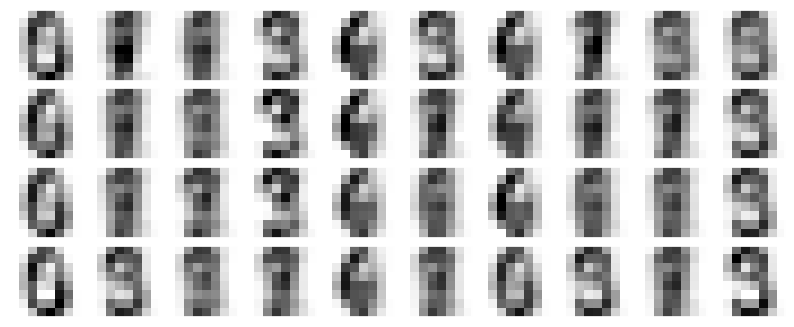

In [ ]:
# run and print a projection based on 2 components
projected = projector(digits, 2)
plot_digits(projected)

The printed text confirms the transform worked. We've keep all the rows (this is not clustering) but only 2x dimensions/columns (from the original 64 pixel columns). However, this seems a bit too aggressive (keeping ~29% explained variance). Let's try 16 components - 25% of the original 8*8 dimensions:

Original size = (1797, 64)
New size = (1797, 16)


Total explained variance: 0.8494


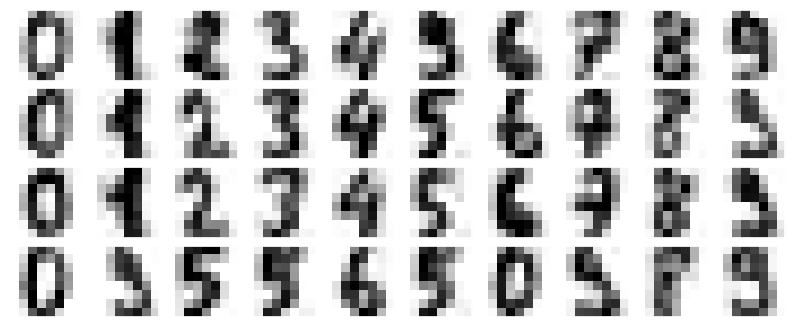

In [ ]:
# run and print a projection based on 16 components (25% of the original size)
projected = projector(digits, 16)
plot_digits(projected)

Getting better ... 85% variance explained and mostly legible! But is it "optimal"? We can use the explained variance chart to to help:

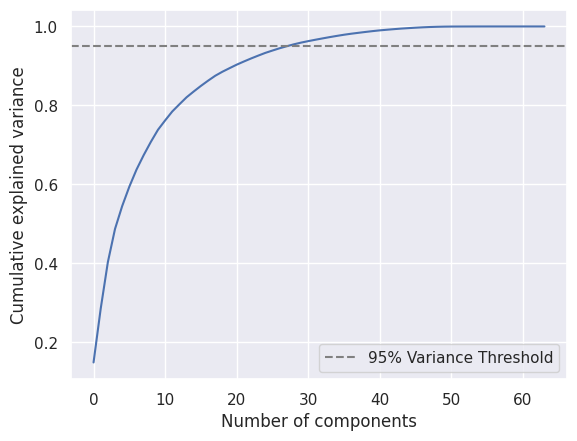

In [ ]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.95, color='gray', linestyle='--', label='95% Variance Threshold')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.legend();

According to the chart, nearly! The common rule of a 95% variance threshold (i.e. a value of K that keeps variance above 95% of the original space) suggests mid-20s. Have a look and see how that works for you (remember ... no ground truth!).

